# Earthquake Prediction Using Machine Learning Techniques

## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load the dataset
df = pd.read_csv("Central-Asian-earthquake-dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5290 non-null   object 
 1   Time       5290 non-null   object 
 2   Latitude   5290 non-null   float64
 3   Longitude  5290 non-null   float64
 4   Depth      5290 non-null   float64
 5   Magnitude  5290 non-null   float64
 6   Country    5290 non-null   object 
dtypes: float64(4), object(3)
memory usage: 289.4+ KB


## Explore

In [2]:
df.head()

Date      Time  Latitude  Longitude  Depth  Magnitude      Country
0  2023-05-28  00:24:55     36.80      71.31  100.0        4.6  Afghanistan
1  2023-05-26  13:08:12     40.32      74.01   20.0        4.2   Kyrgyzstan
2  2023-05-26  07:34:47     37.87      73.52  179.0        4.3   Tajikistan
3  2023-05-25  16:00:16     37.04      71.11  229.0        4.0  Afghanistan
4  2023-05-25  04:30:49     36.43      71.13  100.0        4.1  Afghanistan

In [3]:
df.describe()

Latitude    Longitude        Depth    Magnitude
count  5290.000000  5290.000000  5290.000000  5290.000000
mean     40.344571    68.392807    12.413837     2.398544
std       1.090507     3.477648    24.703204     0.603487
min      34.220000    58.800000     0.000000     1.200000
25%      39.730000    64.540000     5.000000     2.000000
50%      40.360000    68.240000     7.000000     2.300000
75%      41.230000    71.750000    13.000000     2.700000
max      43.620000    78.740000   391.000000     6.600000

In [4]:
df["Country"].unique()

array(['Afghanistan', 'Kyrgyzstan', 'Tajikistan', 'Uzbekistan',
       'Uzbekistan-Kyrgyzstan border', 'China', 'Kazakhstan',
       'Turkmenistan', 'Uzbekistan-Tajikistan border',
       'China-Kyrgyzstan border'], dtype=object)

In [5]:
# Filter DataFrame for magnitudes greater than 5.0
filtered_df = df[df["Magnitude"] > 5.0]

# If there are any rows left after filtering, proceed
if not filtered_df.empty:
    # Group by country and find the maximum magnitude for each country
    max_magnitude_per_country = filtered_df.groupby("Country")["Magnitude"].max().reset_index()

    # Sort by magnitude in descending order and get the top 5 countries
    top_countries = max_magnitude_per_country.sort_values(by="Magnitude", ascending=False).head(5)

    print(top_countries)
else:
    print("No countries with magnitude greater than 5.0.")

       Country  Magnitude
0  Afghanistan        6.6
2   Tajikistan        6.0
3   Uzbekistan        5.8
1   Kyrgyzstan        5.1


In [6]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="Longitude",
    y="Latitude",
    z="Magnitude",
    labels={"longitude": "Longitude", "latitude": "Latitude", "magnitude": "Magnitude"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Set plot title
fig.update_layout(title="3D Scatter Plot: Magnitude by Location")

# Display figure
fig.show()

In [7]:
# Center coordinates for Central Asia
center = {"lat": 40.03, "lon": 72.37}

# Assuming df is your DataFrame with the necessary columns
fig = px.scatter_mapbox(
    df,
    lat="Latitude",  
    lon="Longitude",
    center=center,
    width=900,
    height=700,
    color="Magnitude",
    hover_data=["Magnitude"],
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

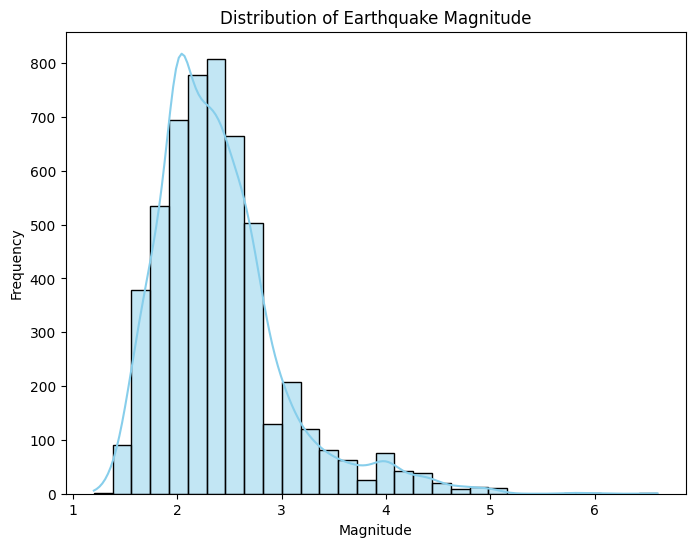

In [8]:


# Histogram of Magnitude
plt.figure(figsize=(8, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


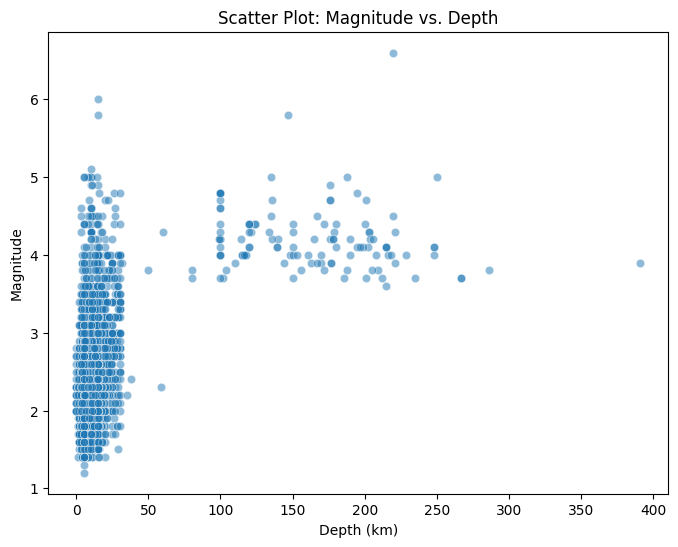

In [9]:
# Scatter plot of Magnitude vs. Depth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Depth', y='Magnitude', data=df, alpha=0.5)
plt.title('Scatter Plot: Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

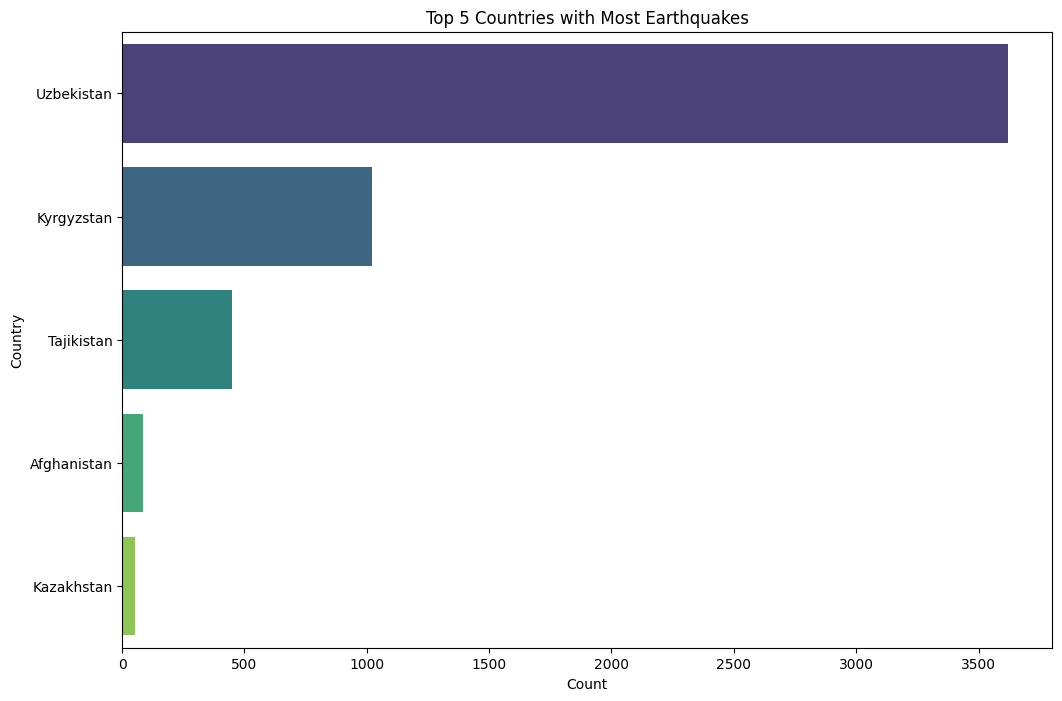

In [10]:
# Bar plot of earthquake counts by Country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:5], palette='viridis')
plt.title('Top 5 Countries with Most Earthquakes')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [11]:
df['Country'].value_counts().index[:5]

Index(['Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Afghanistan', 'Kazakhstan'], dtype='object')

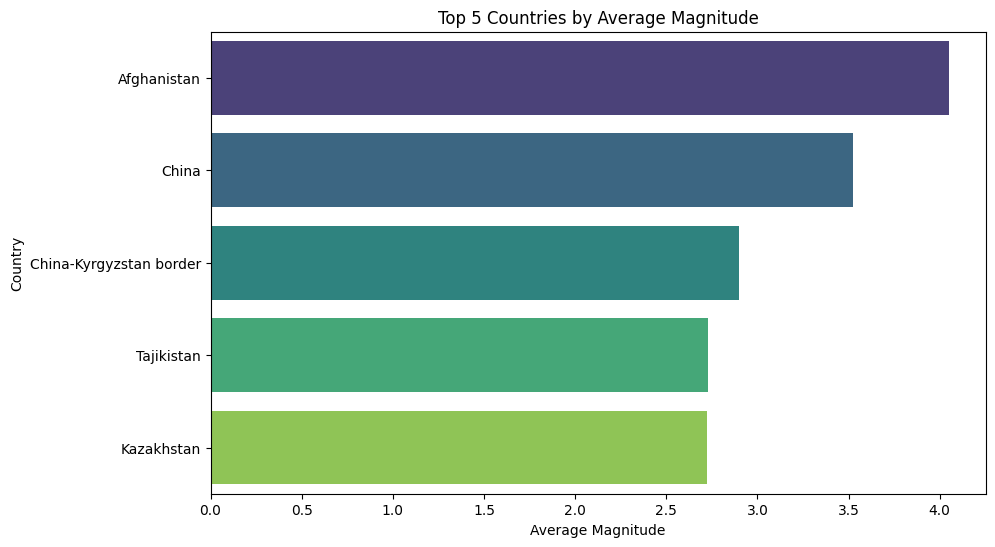

In [12]:
# Group by country and calculate average magnitude
avg_magnitude_by_country = df.groupby("Country")["Magnitude"].mean().reset_index()

# Sort by average magnitude in descending order and select top 5
top_5_countries = avg_magnitude_by_country.sort_values(by="Magnitude", ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Magnitude", y="Country", data=top_5_countries, palette="viridis")
plt.title("Top 5 Countries by Average Magnitude")
plt.xlabel("Average Magnitude")
plt.ylabel("Country")
plt.show()

In [13]:
top_5_countries

Country  Magnitude
0              Afghanistan   4.048810
1                    China   3.525000
2  China-Kyrgyzstan border   2.900000
5               Tajikistan   2.729688
3               Kazakhstan   2.722642

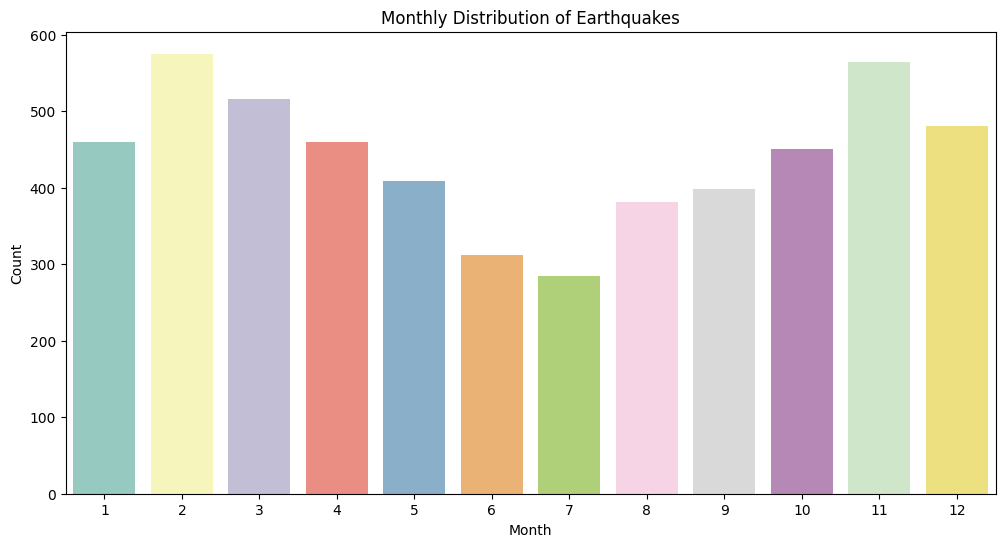

In [14]:
# Extract year and month from DateTime
# Convert Date and Time to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Monthly distribution of earthquakes
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, palette='Set3')
plt.title('Monthly Distribution of Earthquakes')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

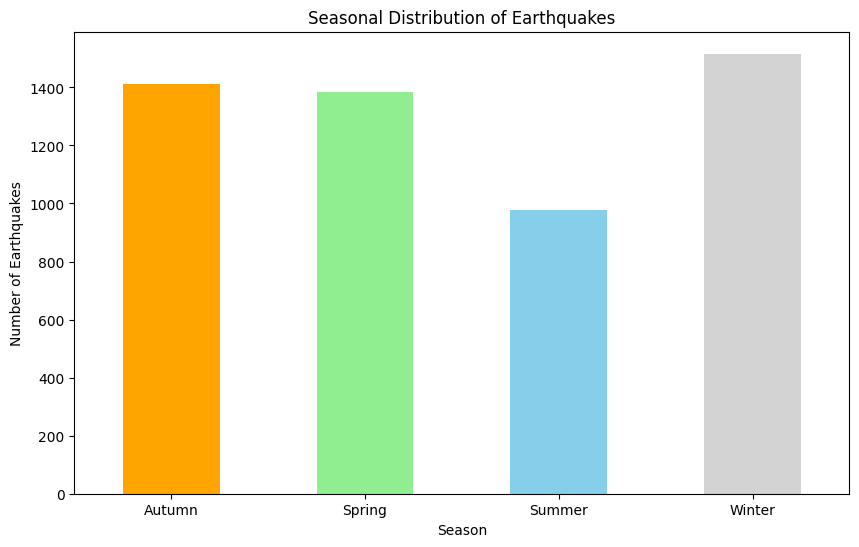

In [15]:
# Define seasons
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Add a new column for season
df["Season"] = df["Date"].dt.month.map(get_season)

# Group by season and count earthquakes
seasonal_counts = df.groupby("Season").size()

# Define colors for each season
colors = {"Spring": "lightgreen", "Summer": "skyblue", "Autumn": "orange", "Winter": "lightgrey"}

# Plotting
plt.figure(figsize=(10, 6))
seasonal_counts.plot(kind="bar", color=[colors[season] for season in seasonal_counts.index])
plt.title("Seasonal Distribution of Earthquakes")
plt.xlabel("Season")
plt.ylabel("Number of Earthquakes")
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

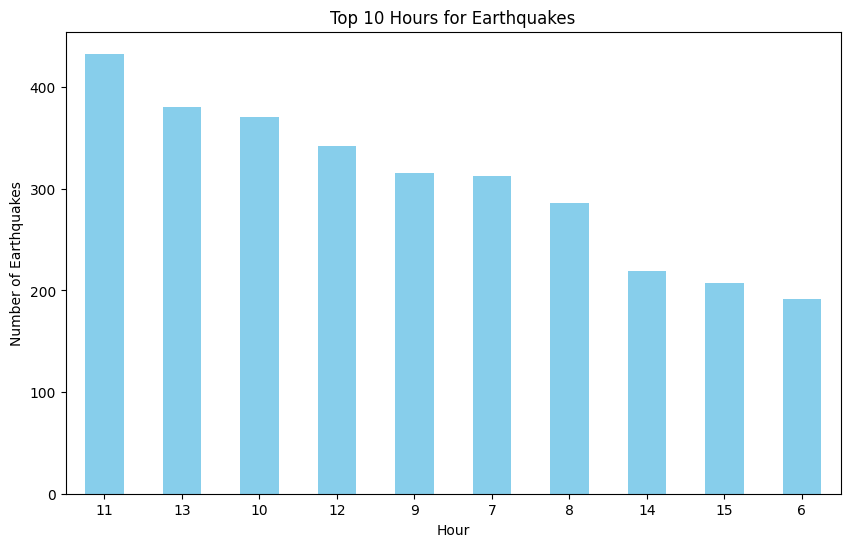

In [16]:
# Extract hour from time
df["Hour"] = df["Time"].dt.hour

# Group by hour and count earthquakes
hourly_counts = df.groupby("Hour").size()

# Get top 10 hours with the highest earthquake counts
top_10_hours = hourly_counts.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_hours.plot(kind="bar", color="skyblue")
plt.title("Top 10 Hours for Earthquakes")
plt.xlabel("Hour")
plt.ylabel("Number of Earthquakes")
plt.xticks(rotation=0)
plt.show()

In [17]:
# Extract hour from time
df["Hour"].unique()

array([ 0, 13,  7, 16,  4,  8, 23, 10, 19,  2, 12,  6, 18,  5,  3, 11, 15,
        9,  1, 14, 20, 22, 21, 17])

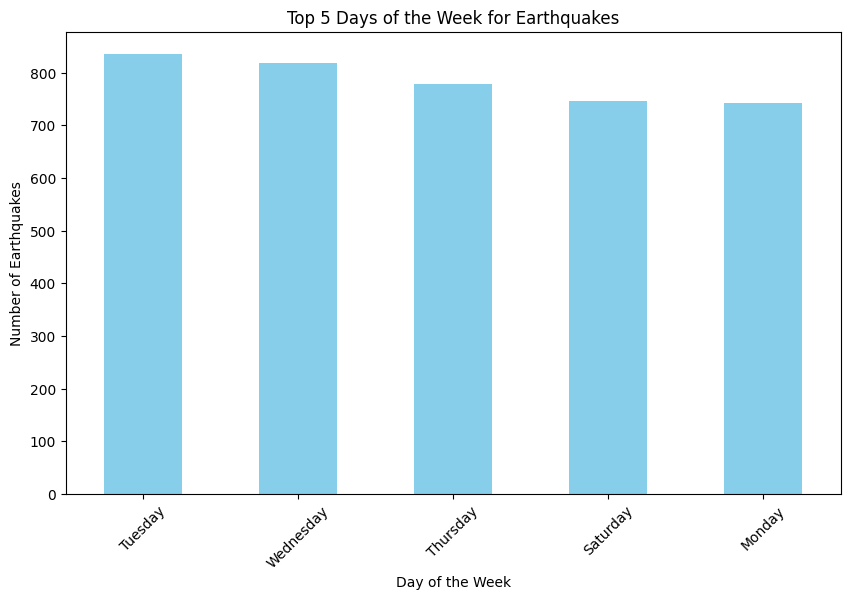

In [18]:
# Extract day of the week from date (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df["DayOfWeek"] = df["Date"].dt.dayofweek

# Define weekday names
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day of the week and count earthquakes
daily_counts = df.groupby("DayOfWeek").size()

# Get top 5 days with the highest earthquake counts
top_5_days = daily_counts.nlargest(5)

# Map day of the week to weekday name
top_5_days.index = top_5_days.index.map(lambda x: weekday_names[x])

# Plotting
plt.figure(figsize=(10, 6))
top_5_days.plot(kind="bar", color="skyblue")
plt.title("Top 5 Days of the Week for Earthquakes")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Earthquakes")
plt.xticks(rotation=45)
plt.show()

/var/folders/zp/hlds8m997jl7vy4l10k7qd2w0000gn/T/ipykernel_2120/2871390671.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



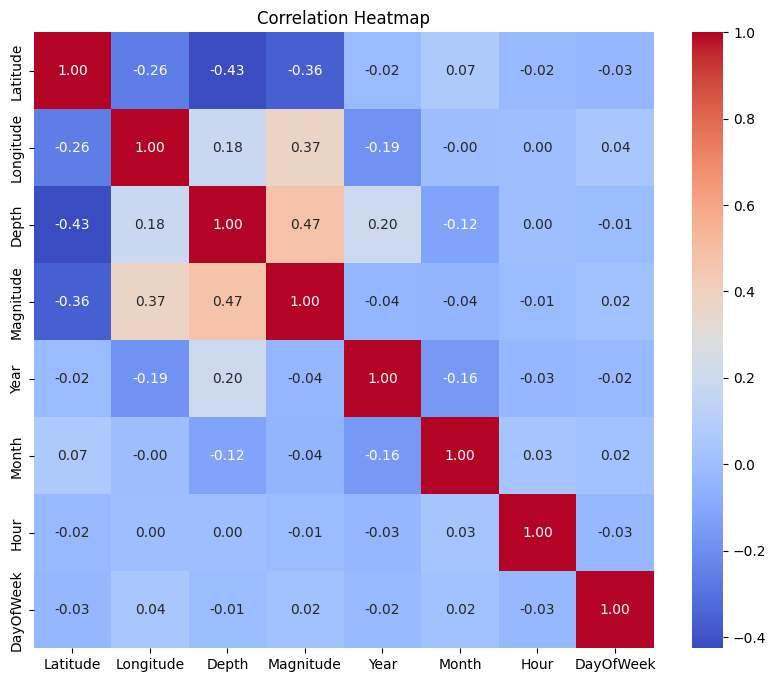

In [19]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plotting heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df.corr()

/var/folders/zp/hlds8m997jl7vy4l10k7qd2w0000gn/T/ipykernel_2120/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Latitude  Longitude     Depth  Magnitude      Year     Month  \
Latitude   1.000000  -0.261684 -0.426123  -0.364331 -0.015052  0.067196   
Longitude -0.261684   1.000000  0.184091   0.374080 -0.185530 -0.004001   
Depth     -0.426123   0.184091  1.000000   0.470875  0.196334 -0.117469   
Magnitude -0.364331   0.374080  0.470875   1.000000 -0.037815 -0.041788   
Year      -0.015052  -0.185530  0.196334  -0.037815  1.000000 -0.161531   
Month      0.067196  -0.004001 -0.117469  -0.041788 -0.161531  1.000000   
Hour      -0.020307   0.002216  0.002710  -0.014317 -0.033422  0.033664   
DayOfWeek -0.034560   0.042821 -0.010191   0.019229 -0.022961  0.016001   

               Hour  DayOfWeek  
Latitude  -0.020307  -0.034560  
Longitude  0.002216   0.042821  
Depth      0.002710  -0.010191  
Magnitude -0.014317   0.019229  
Year      -0.033422  -0.022961  
Month      0.033664   0.016001  
Hour       1.000000  -0.026944  
DayOfWeek -0.026944   1.000000

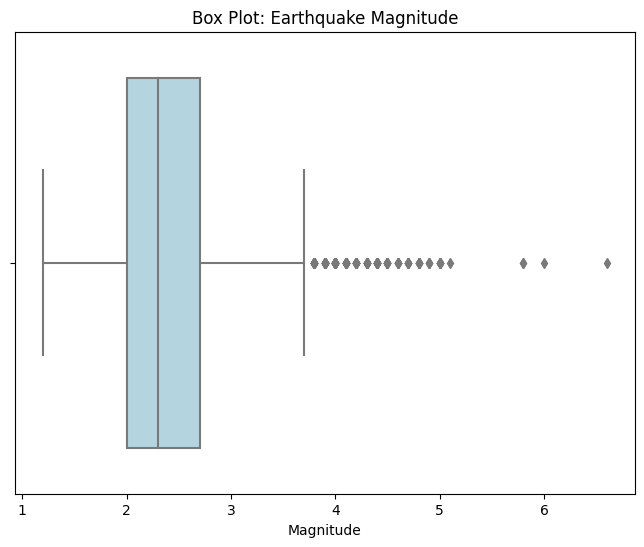

In [21]:
# Box plot of Magnitude to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Magnitude', data=df, color='lightblue')
plt.title('Box Plot: Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.show()

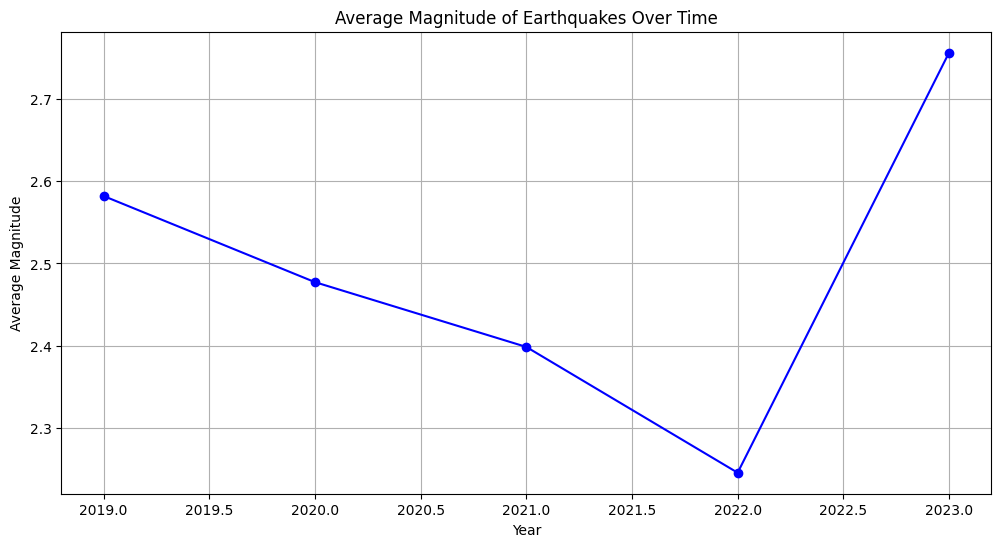

In [22]:
# Group by year and calculate average magnitude
magnitude_by_year = df.groupby(df['Date'].dt.year)['Magnitude'].mean()

# Plotting average magnitude over time
plt.figure(figsize=(12, 6))
plt.plot(magnitude_by_year.index, magnitude_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Magnitude of Earthquakes Over Time')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()

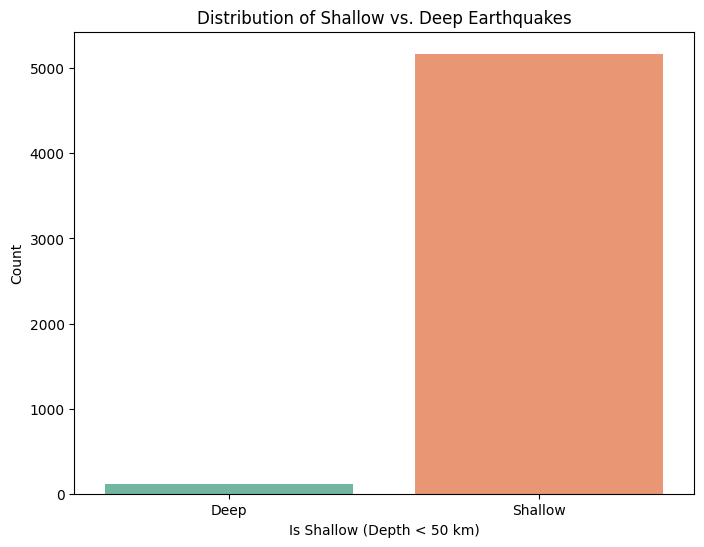

In [23]:
# Example: Create a binary feature for shallow earthquakes (< 50 km depth)
df['IsShallow'] = (df['Depth'] < 50).astype(int)

# Visualize distribution of shallow vs. deep earthquakes
plt.figure(figsize=(8, 6))
sns.countplot(x='IsShallow', data=df, palette='Set2')
plt.title('Distribution of Shallow vs. Deep Earthquakes')
plt.xlabel('Is Shallow (Depth < 50 km)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Deep', 'Shallow'])
plt.show()

In [24]:
# Filter earthquakes in Kyrgyzstan
earthquakes_kg = df[df['Country'] == 'Kyrgyzstan']

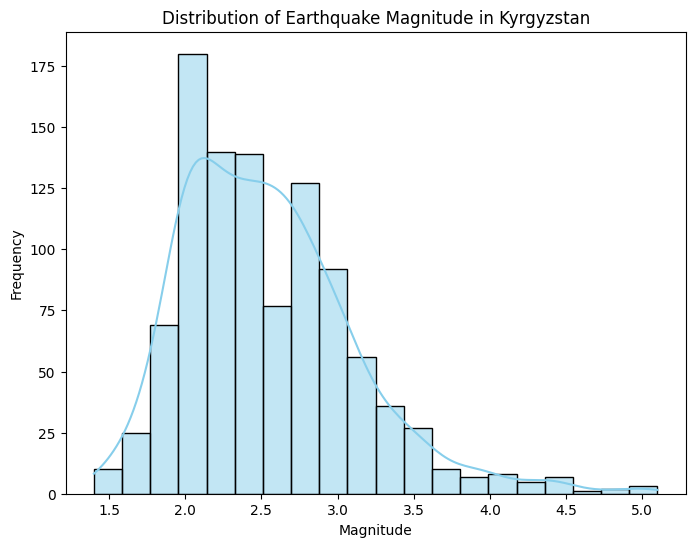

In [25]:
# Histogram of Magnitude in Kyrgyzstan
plt.figure(figsize=(8, 6))
sns.histplot(earthquakes_kg['Magnitude'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitude in Kyrgyzstan')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

/var/folders/zp/hlds8m997jl7vy4l10k7qd2w0000gn/T/ipykernel_2120/3568866436.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



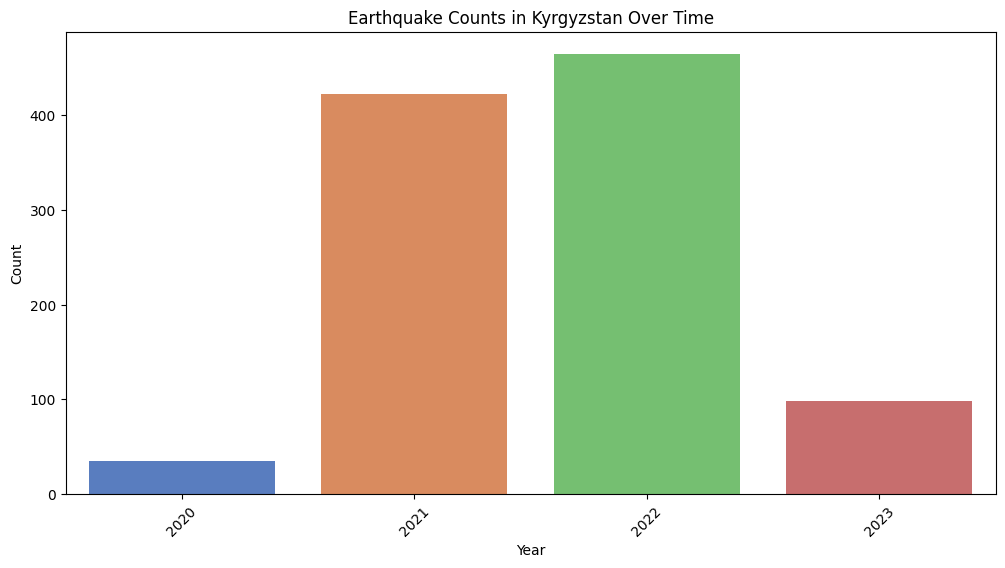

In [26]:
# Extract year from DateTime for earthquakes in Kyrgyzstan
earthquakes_kg['Year'] = earthquakes_kg['Date'].dt.year

# Plotting earthquake counts in Kyrgyzstan over time
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=earthquakes_kg, palette='muted')
plt.title('Earthquake Counts in Kyrgyzstan Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

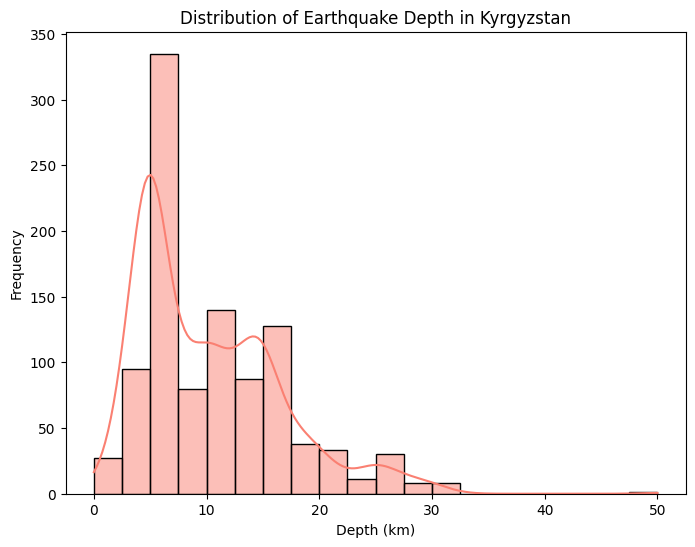

In [27]:
# Histogram of Depth in Kyrgyzstan
plt.figure(figsize=(8, 6))
sns.histplot(earthquakes_kg['Depth'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Earthquake Depth in Kyrgyzstan')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

/var/folders/zp/hlds8m997jl7vy4l10k7qd2w0000gn/T/ipykernel_2120/2785921448.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



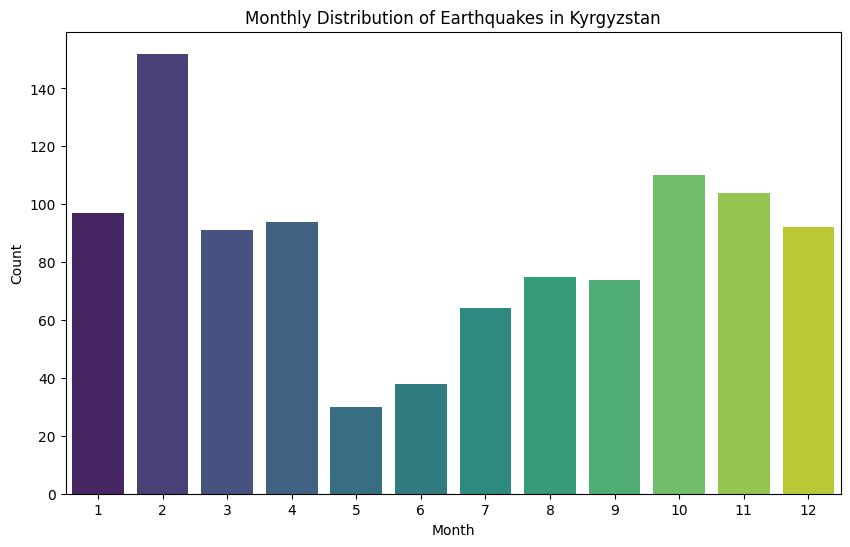

In [28]:
# Extract month from DateTime for earthquakes in Kyrgyzstan
earthquakes_kg['Month'] = earthquakes_kg['Date'].dt.month

# Plotting earthquake counts by month in Kyrgyzstan
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=earthquakes_kg, palette='viridis')
plt.title('Monthly Distribution of Earthquakes in Kyrgyzstan')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

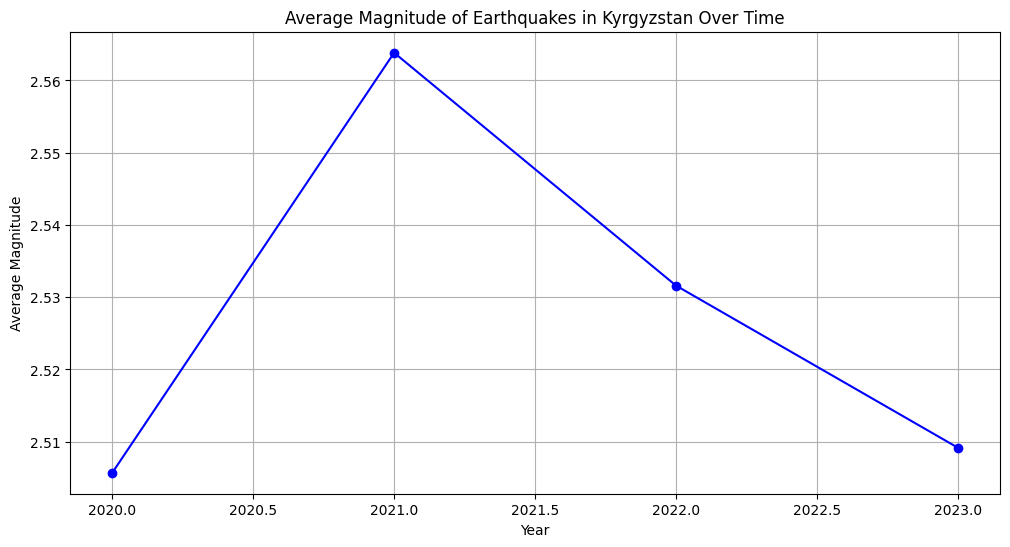

In [29]:
# Group by year and calculate average magnitude in Kyrgyzstan
magnitude_by_year_kg = earthquakes_kg.groupby(earthquakes_kg['Date'].dt.year)['Magnitude'].mean()

# Plotting average magnitude in Kyrgyzstan over time
plt.figure(figsize=(12, 6))
plt.plot(magnitude_by_year_kg.index, magnitude_by_year_kg.values, marker='o', linestyle='-', color='b')
plt.title('Average Magnitude of Earthquakes in Kyrgyzstan Over Time')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()

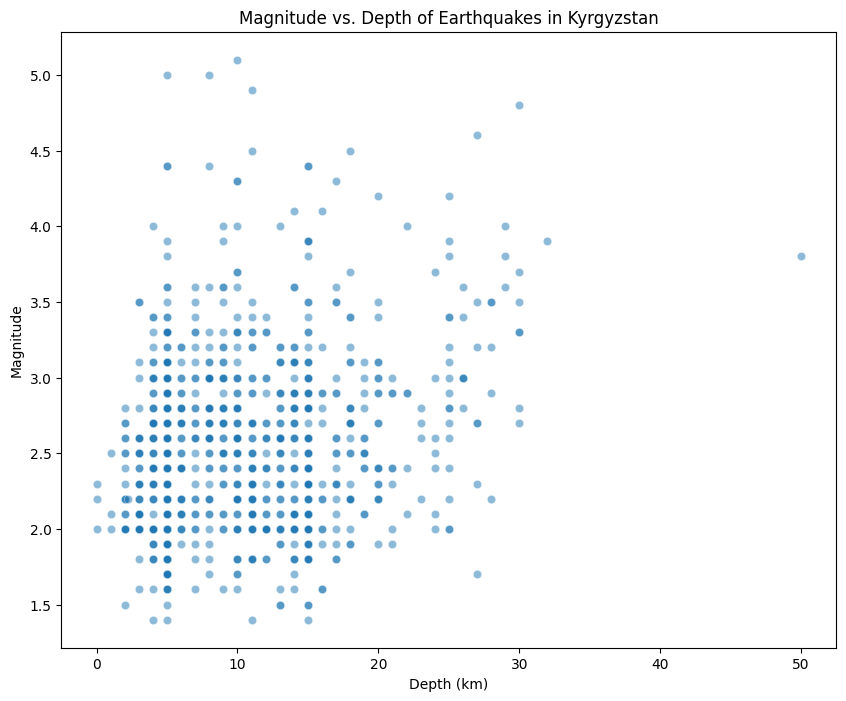

In [30]:
# Scatter plot of Magnitude vs. Depth in Kyrgyzstan
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Depth', y='Magnitude', data=earthquakes_kg, alpha=0.5)
plt.title('Magnitude vs. Depth of Earthquakes in Kyrgyzstan')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

# Data Preparation

In [31]:
# Extract relevant features
features = df[['Latitude', 'Longitude', 'Depth', 'Date', 'Time', 'Country']].copy()
target = df['Magnitude']

# Convert Date and Time to datetime objects
features['Date'] = pd.to_datetime(features['Date'])
features['Time'] = pd.to_datetime(features['Time'])

# Extract additional features from Date and Time
features['Year'] = features['Date'].dt.year
features['Month'] = features['Date'].dt.month
features['Day'] = features['Date'].dt.day
features['Hour'] = features['Time'].dt.hour
features['Minute'] = features['Time'].dt.minute

# Drop Date and Time columns as they are now redundant
features.drop(['Date', 'Time'], axis=1, inplace=True)

# One-hot encode the Country column
features = pd.get_dummies(features, columns=['Country'], drop_first=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Baseline Model

In [33]:
baseline_predictions = [y_train.mean()] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
print("Baseline Mean Absolute Error:", baseline_mae)

Baseline Mean Absolute Error: 0.4536169646334883


# Model Training and Evaluation

In [34]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    mse, mae, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display results
for name, metrics in results.items():
    print(f"{name}:")
    print(f" Mean Squared Error (MSE): {metrics['MSE']}")
    print(f" Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f" R^2 Score: {metrics['R2']}\n")


Linear Regression:
 Mean Squared Error (MSE): 0.2607768372030258
 Mean Absolute Error (MAE): 0.37261150682018096
 R^2 Score: 0.3314224438896459

Random Forest:
 Mean Squared Error (MSE): 0.1964612551984877
 Mean Absolute Error (MAE): 0.3013799621928166
 R^2 Score: 0.4963142153276585

Gradient Boosting:
 Mean Squared Error (MSE): 0.20294202078765217
 Mean Absolute Error (MAE): 0.312408817033722
 R^2 Score: 0.47969888067677335

Support Vector Machine:
 Mean Squared Error (MSE): 0.3199586202555873
 Mean Absolute Error (MAE): 0.4120314480863327
 R^2 Score: 0.17969266488044



# Hyperparameter Tuning

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [36]:
mse, mae, r2 = evaluate_model(best_model, X_test, y_test)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE): 0.19190998028012224
Mean Absolute Error (MAE): 0.2967343312823722
R^2 Score: 0.5079827373280925


# Communicate

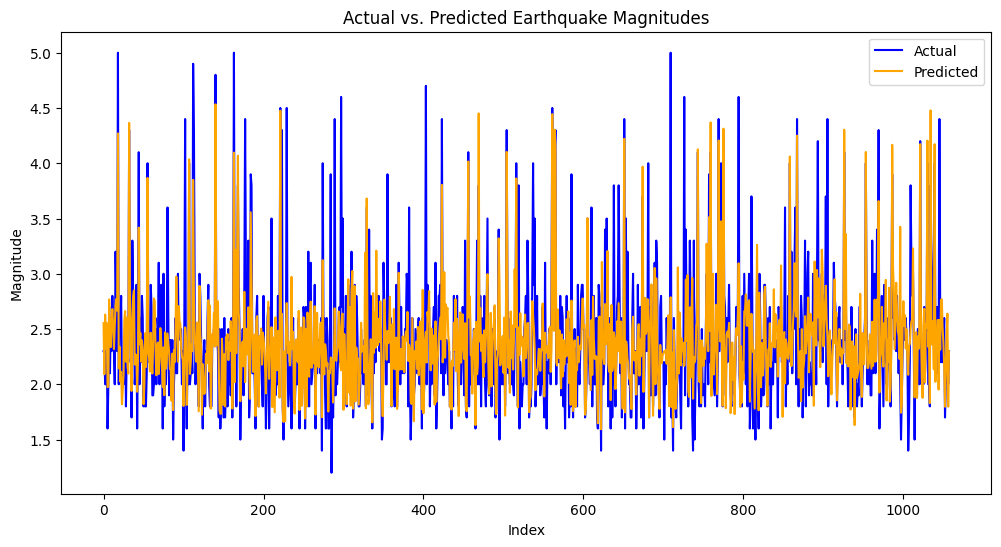

In [37]:
# Get predictions from the best model
best_model_predictions = best_model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(best_model_predictions, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Earthquake Magnitudes')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


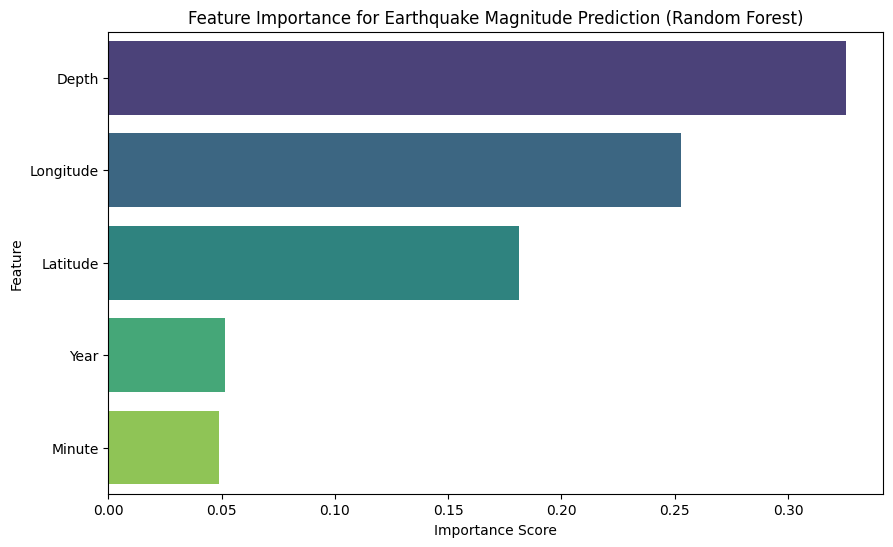

In [38]:
# Get feature importances
feature_importances = best_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1][:5]

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance for Earthquake Magnitude Prediction (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [39]:
features[indices]

Index(['Depth', 'Longitude', 'Latitude', 'Year', 'Minute'], dtype='object')